<a href="https://colab.research.google.com/github/Walbyq/math-statistics/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабараторная работа №1. Розыгрыш стандартных дискретных случайных величин

Очистка данных

In [ ]:
%reset -f
import gc
gc.collect()

0

Расчеты

In [ ]:
import numpy as np
from scipy.stats import binom

# Функция для создания кумулятивного биномиального распределения
def create_cumulative_binomial(n, p):
    # Вычисляем вероятности для каждого возможного исхода
    probabilities = [binom.pmf(k, n, p) for k in range(n + 1)]
    # Возвращаем кумулятивную сумму вероятностей
    return np.cumsum(probabilities)

# Функция для выбора значения на основе кумулятивного распределения
def sample_from_distribution(cumulative_prob):
    # Генерируем случайное число
    r = np.random.random()
    # Находим индекс первого элемента, больший или равный случайному числу
    return np.searchsorted(cumulative_prob, r)

# Параметры распределения
n, p = 10, 0.01
size = 100

# Создаем кумулятивное распределение
cumulative_prob = create_cumulative_binomial(n, p)

# Генерация значений
sample = [sample_from_distribution(cumulative_prob) for _ in range(size)]

Гистограмма

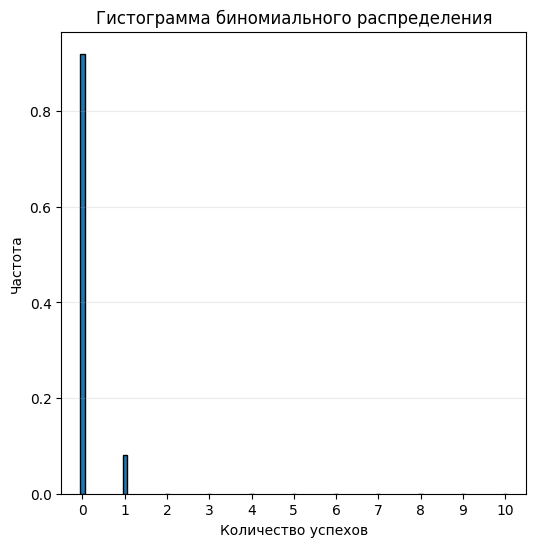

In [ ]:
import matplotlib.pyplot as plt

# Создаем гистограмму
plt.figure(figsize=(6, 6))
plt.hist(sample, bins=range(0, n+2), align='left',
         rwidth=0.1, density=True, edgecolor='black')
plt.xlim(-0.5, n+0.5)
plt.xticks(np.arange(0, n+1))
plt.grid(axis='y', alpha=0.25)
plt.title('Гистограмма биномиального распределения')
plt.xlabel('Количество успехов')
plt.ylabel('Частота')
plt.show()

Статистика

In [ ]:
from collections import Counter

# Подсчет частоты каждого значения
value_counts = Counter(sample)

print("Статистика:")
for value in sorted(value_counts.keys()):
    count = value_counts[value]
    percentage = (count / len(sample)) * 100
    print(f"Значение {value}: {count} раз ({percentage:.2f}%)")

Статистика:
Значение 0: 92 раз (92.00%)
Значение 1: 8 раз (8.00%)


# Лабараторная работа №2. Розыгрыш стандартных непрерывных случайных величин

Очистка данных

In [ ]:
%reset -f
import gc
gc.collect()

0

Расчеты

In [ ]:
import numpy as np

# Параметры равномерного распределения
a, b = 2, 4
size = 200

# Обратная функция равномерного распределения
def inverse_uniform(min, max, x):
    return min + (max - min) * x

# Генерация выборки с использованием обратной функции
sample = inverse_uniform(a, b, np.random.random(size))

Гистограмма

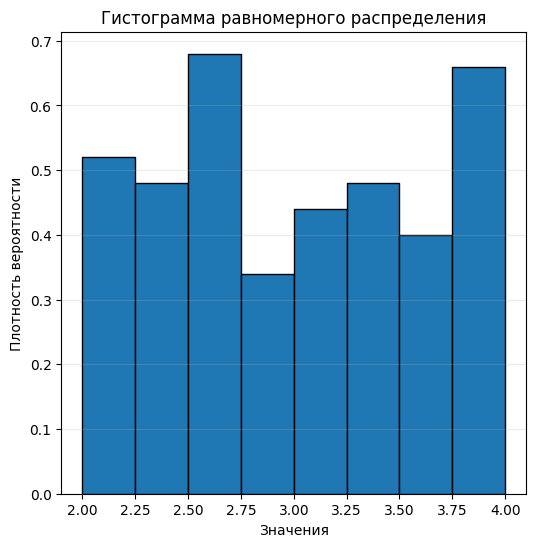

In [ ]:
import matplotlib.pyplot as plt
import math

# Вычисляем рекомендуемое количество столбцов
bins = round(math.log2(size))

# Создаем равномерно распределенные границы для bins
bin_edges = np.linspace(a, b, bins + 1)

# Создаем гистограмму
plt.figure(figsize=(6, 6))
plt.hist(sample, bins=bin_edges, density=True, edgecolor='black')
plt.grid(axis='y', alpha=0.25)
plt.xticks(bin_edges)
plt.title('Гистограмма равномерного распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')

plt.show()

Статистика

In [ ]:
print("Статистика:")
print(f"Фактическое среднее значение: {np.mean(sample):.2f}")
print(f"Теоретическое среднее значение: {(a+b)/2}")

Статистика:
Фактическое среднее значение: 3.00
Теоретическое среднее значение: 3.0
